<a href="https://colab.research.google.com/github/alinarogova/HW/blob/master/%D0%94%D0%97_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

[Опис даних](https://search.r-project.org/CRAN/refmans/PPtreeregViz/html/insurance.html)

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/HalyshAnton/IT-Step-Pyton-AI/main/module3/data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
df = df.select_dtypes('number')

df.head()

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86


# Завдання 1
Виведіть основні числові характеристики та кількість пропущених значень по стовпчиках

In [ ]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


BMI = 53.1 це досить сильне ожиріння, дані підозрілі на викид.

<Axes: >

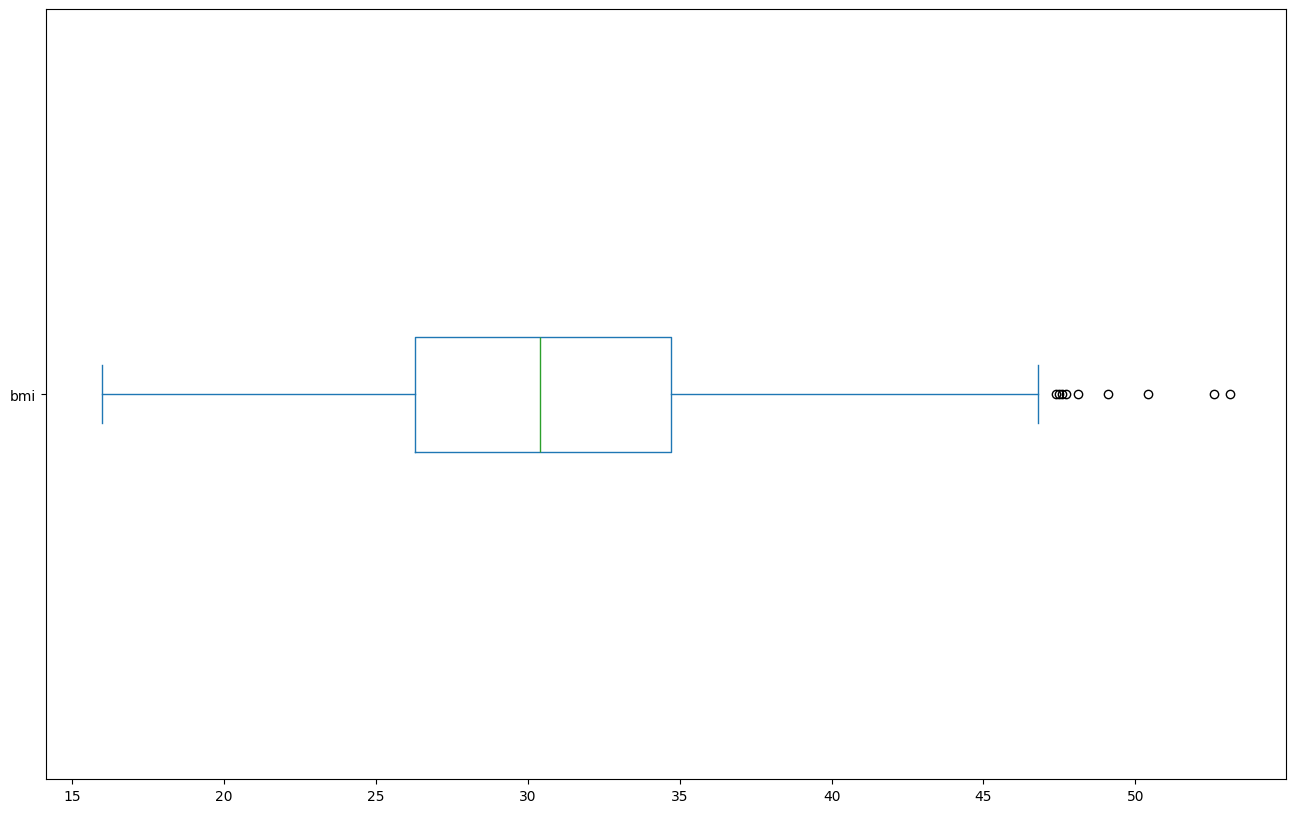

In [ ]:
df.bmi.plot(kind="box", vert=False, figsize=(16,10))

In [ ]:
df[df.bmi>50]

,age,bmi,children,expenses
847,23,50.4,1,2438.06
1047,22,52.6,1,44501.40
1317,18,53.1,0,1163.46


Вирішила не чистити ці дані, вони не настільки вибиваються з загальної картиини

In [ ]:
df.isna().sum()

,0
age,0
bmi,0
children,0
expenses,0


Пропущених значень немає

# Завдання 2
Розділіть дані на залежну y(`expenses`) та незалежну X ознаки. Розділіть дані на тренувальну та тестову частини

In [ ]:
y = df['expenses']
X = df.drop(columns='expenses')

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)
X.head()

,age,bmi,children
0,19,27.9,0
1,18,33.8,1
2,28,33.0,3
3,33,22.7,0
4,32,28.9,0


In [ ]:
y.head()


,expenses
0,16884.92
1,1725.55
2,4449.46
3,21984.47
4,3866.86


# Завдання 3
Натренуйте LinearRegression та виведіть такі метрики: MAE, RMSE, R2

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

# тренування
model.fit(X_train, y_train)

y_pred = model.predict(X_train)



In [ ]:

from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  #df.loc["MSE", name] = metrics.mean_squared_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)



In [ ]:

result = pd.DataFrame()
result['train'] = get_metrics(y_train, y_pred)

y_pred = model.predict(X_test)
result['test'] = get_metrics(y_test, y_pred)


result1 = result
result

,train,test
MAE,9.005730e+03,9.181190e+03
MSE,1.284646e+08,1.311886e+08
RMSE,1.133422e+04,1.145376e+04
R2,1.100000e-01,1.500000e-01


In [1]:
pd.set_option('display.float_format', '{:.8f}'.format)
result

NameError: name 'pd' is not defined

# Завдання 4
Напишіть рівняння регресії за прикладом:
Ціна = 1.02*Температура - 15.6

In [ ]:
model.coef_

array([220.72663858, 332.6473806 , 563.40009115])

expenses = 220.7*age+332.6*bmi+563.4*children (округлила коєфіціенти до одного знака після коми)

# Завдання 5 (оптимально)
Перевірте як видалення викидів вплине на результат. Розгляньте один з варіантів:
* видалення викидів по стовпчику `expenses`
* видалення викидів по всіх стовпчиків

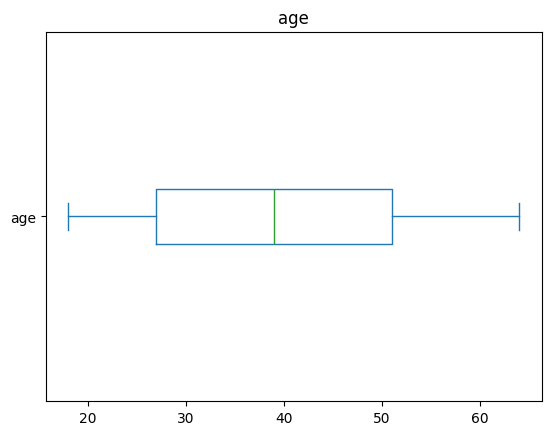

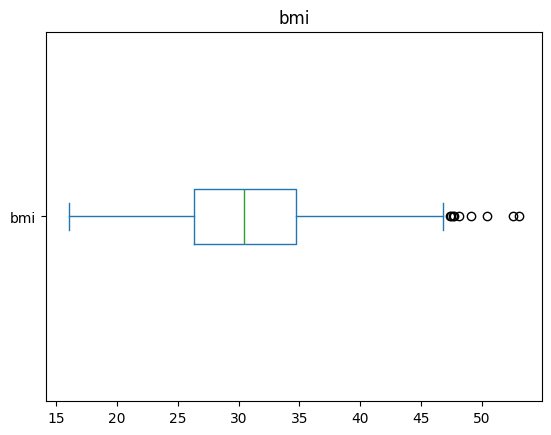

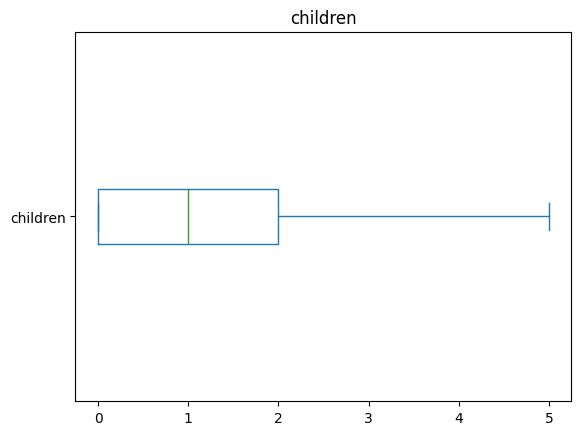

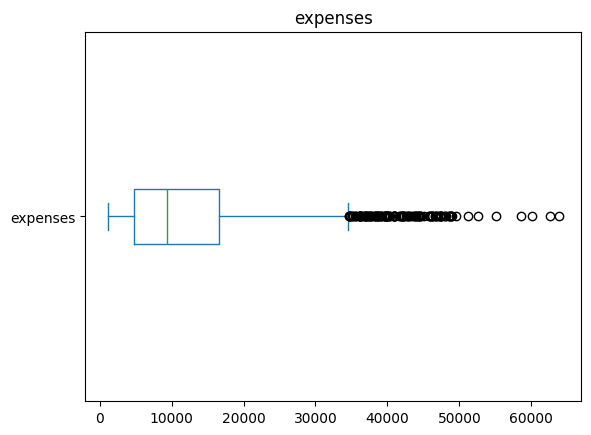

In [ ]:
for col in df.columns:
  df[col].plot(kind="box", vert=False)
  plt.title(col)
  plt.show()


In [ ]:
(df['expenses']>35000).sum()

133

In [ ]:
(df['expenses']>50000).sum()

7

Спробую провести аналіз, позбавившись всіх викидів в expenses


In [ ]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
df_clear=df[df['expenses']<35000]
df_clear.describe()

,age,bmi,children,expenses
count,1205.000000,1205.000000,1205.000000,1205.000000
mean,38.910373,30.110539,1.079668,10051.385959
std,14.081405,5.999350,1.213282,7431.695026
min,18.000000,16.000000,0.000000,1121.870000
25%,26.000000,25.800000,0.000000,4428.890000
50%,39.000000,29.800000,1.000000,8442.670000
75%,51.000000,33.800000,2.000000,13012.210000
max,64.000000,53.100000,5.000000,34838.870000


In [ ]:
df_clear.nlargest(5, "expenses")

,age,bmi,children,expenses
314,27,31.4,0,34838.87
1291,19,34.9,0,34828.65
689,27,31.1,1,34806.47
223,19,34.8,0,34779.62
1078,28,31.7,0,34672.15


<Axes: ylabel='Frequency'>

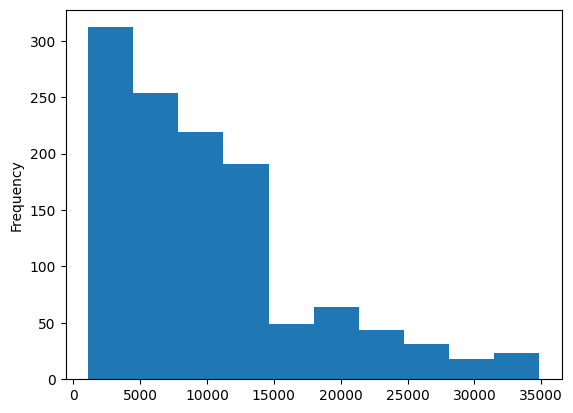

In [ ]:
df_clear["expenses"].plot(kind="hist")

In [ ]:
y = df_clear['expenses']
X = df_clear.drop(columns="expenses")
y.head(), X.head()

(0    16884.92
 1     1725.55
 2     4449.46
 3    21984.47
 4     3866.86
 Name: expenses, dtype: float64,
    age   bmi  children
 0   19  27.9         0
 1   18  33.8         1
 2   28  33.0         3
 3   33  22.7         0
 4   32  28.9         0)

In [ ]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    random_state=42)
X_train.shape


(964, 3)

In [ ]:

from sklearn.linear_model import LinearRegression

model = LinearRegression()

# тренування
model.fit(X_train, y_train)

y_pred = model.predict(X_train)


In [ ]:
from sklearn import metrics

def get_metrics(y_true, y_pred, name="model"):
  df = pd.DataFrame()

  df.loc["MAE", name] = metrics.mean_absolute_error(y_true, y_pred)
  df.loc["MSE", name] = metrics.mean_squared_error(y_true, y_pred)
  df.loc["RMSE", name] = metrics.mean_squared_error(y_true, y_pred) ** 0.5
  df.loc["R2", name] = metrics.r2_score(y_true, y_pred)

  return df.round(2)

In [ ]:
result = pd.DataFrame()
result['train'] = get_metrics(y_train, y_pred)

y_pred = model.predict(X_test)
result['test'] = get_metrics(y_test, y_pred)

result


,train,test
MAE,4718.97,5204.71
MSE,43376551.46,53605334.86
RMSE,6586.09,7321.57
R2,0.18,0.17


In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
result1

,train,test
MAE,9005.73,9181.19
MSE,128464590.78,131188609.81
RMSE,11334.22,11453.76
R2,0.11,0.15


Від значного видалення викидів, модель стала ще гіршою.